# Pymaceuticals Inc.
---

### Analysis

- In this data anlysis 2 set of data merged and was studied.(Mouse ID,Drug Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor Volume (mm3),Metastatic Sites)
- By bar chart of Drug Regimens and Total timepoints for each mouse , it seems that the longivity for mouses that used Capomulin and Ramicane is higher and for Propriva and Infubinol is less.
- with consuming Capomulin the size of the Tumor decreased incrementally and line chart was shown as Campomulin Treatment of Mouse l509.Ramicane
-Those mice which consumed Campolin and Ramicane 
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [6]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [7]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single dataset
total_df = pd.merge(study_results,mouse_metadata, on="Mouse ID",how="left")

# Display the data table for preview
total_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
total_df["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [10]:
# Checking the number of mice.
print(f'The number of mice is {len(total_df["Mouse ID"].value_counts())}.')


The number of mice is 249.


In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupid=total_df.loc[total_df.duplicated(subset = ["Mouse ID" , "Timepoint"]),"Mouse ID"].unique()

dupid

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_set=total_df.loc[total_df["Mouse ID"]=="g989",:]
duplicated_mouse=duplicated_set["Mouse ID"].unique()
duplicated_set

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df=total_df.drop_duplicates(subset="Mouse ID")
new_df=new_df[~new_df["Mouse ID"].isin(duplicated_mouse)]
new_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice in the clean DataFrame.

new_df["Mouse ID"].value_counts()

print(f'The number of mice is {len(new_df["Mouse ID"].value_counts())}.')

The number of mice is 248.


In [15]:
#removed duplicated mouse g989 from total data set
total_df=total_df[~total_df["Mouse ID"].isin(duplicated_mouse)]

In [16]:
mean_df =total_df .groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_df =total_df .groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_df =total_df .groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
st_dev_df =total_df .groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
st_dev_error_df=total_df .groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [17]:
mean_df

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [18]:
summary_df=pd.DataFrame({"Mean Tumor Volume":mean_df,
                         "Median Tumor Volume":median_df,
                         "Tumor Volume Variance":variance_df,
                         "Tumor Volume Std. Dev.":st_dev_df,
                         "Tumor Volume Std. Err.":st_dev_error_df})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

Summary_agg_df =total_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
Summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_df=pd.DataFrame(total_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False))
timepoint_df

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


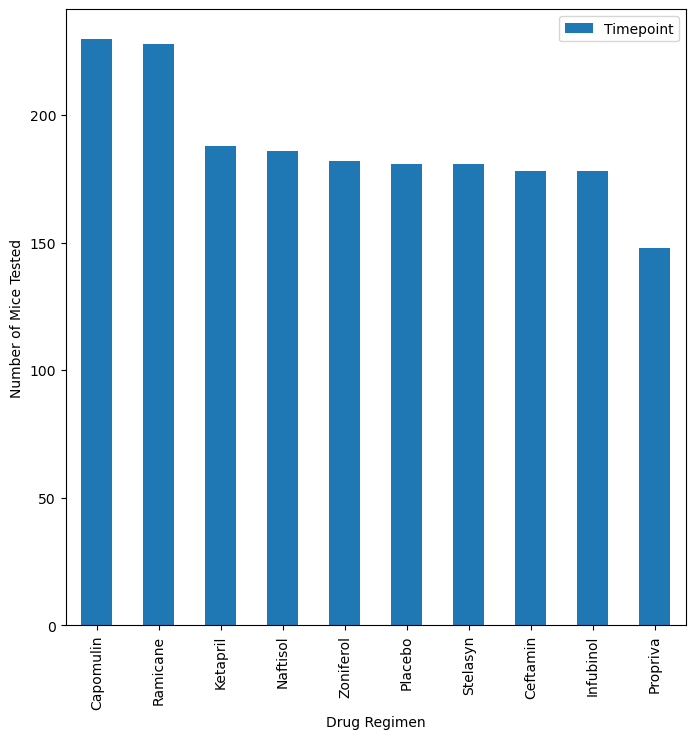

In [21]:
bar_chart =timepoint_df.plot(kind='bar', figsize=(8,8),ylabel="Number of Mice Tested")

In [22]:
timepoint_df=pd.DataFrame(total_df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False))
timepoint_df=timepoint_df.reset_index()
y_axis=timepoint_df["Timepoint"].tolist()
y_axis

[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

In [23]:
x_axis=timepoint_df["Drug Regimen"].tolist()
x_axis

['Capomulin',
 'Ramicane',
 'Ketapril',
 'Naftisol',
 'Zoniferol',
 'Placebo',
 'Stelasyn',
 'Ceftamin',
 'Infubinol',
 'Propriva']

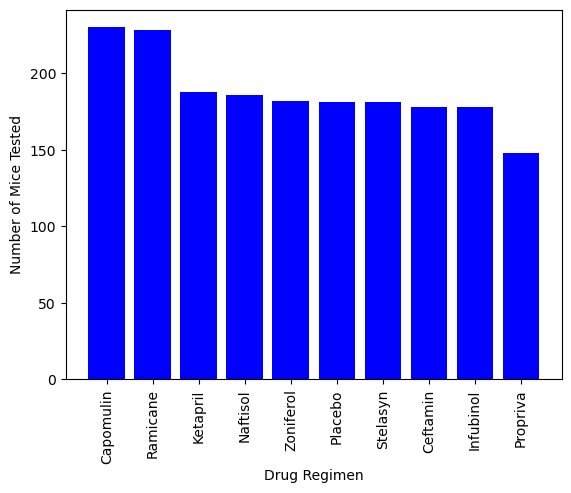

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis,y_axis,color="b", align="center")
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

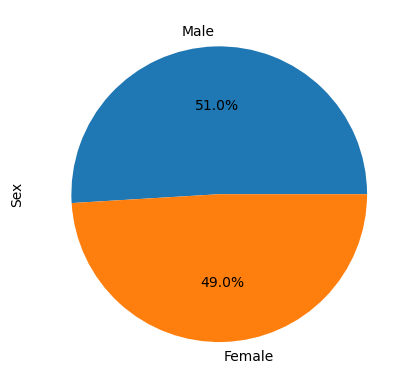

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie = total_df["Sex"].value_counts().plot.pie(autopct='%.1f%%')


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Male","Female"]

sex_df=total_df["Sex"].value_counts()
sex_df

Male      958
Female    922
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Sex')

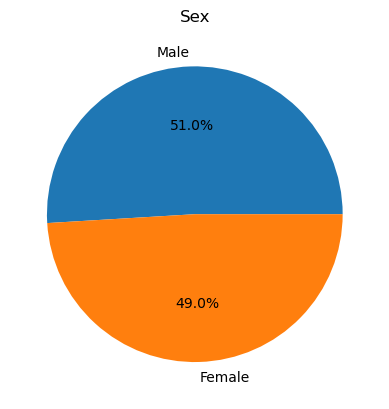

In [27]:
plt.pie(sex_df, labels=labels,autopct="%.1f%%")

plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

volume_data = total_df.drop_duplicates(subset="Mouse ID",keep="last")
volume_data = volume_data.loc[(volume_data["Drug Regimen"]=="Capomulin")|
                         (volume_data["Drug Regimen"]=="Ramicane")|
                         (volume_data["Drug Regimen"]=="Infubinol")|
                         (volume_data["Drug Regimen"]=="Ceftamin"),:]
volume_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
182,u153,0,45.000000,0,Ceftamin,Female,11,25
194,b447,0,45.000000,0,Ceftamin,Male,2,30
217,x226,0,45.000000,0,Ceftamin,Male,23,28
222,t573,0,45.000000,0,Ceftamin,Female,15,27
420,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [35]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_df=total_df[["Mouse ID","Timepoint"]].merge(new_df, on=["Mouse ID","Timepoint"])
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
plotting =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in treatments:
        tumor_vol=mouse_df.loc[mouse_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
        
        plotting.append (tumor_vol)
        
        quartiles=tumor_vol.quantile([.25,.5,.75])
        first_quart=quartiles[0.25]
        last_quart=quartiles[0.75]
        quart_range=last_quart-first_quart
        lower_bound = first_quart - (1.5*quart_range)
        upper_bound=last_quart+(1.5*quart_range)
        outliers=tumor_vol.loc[(tumor_vol< lower_bound)]
        print(f"{drug}'s potential outliers :{outliers}")

Capomulin's potential outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Tumor Volume (mm3)')

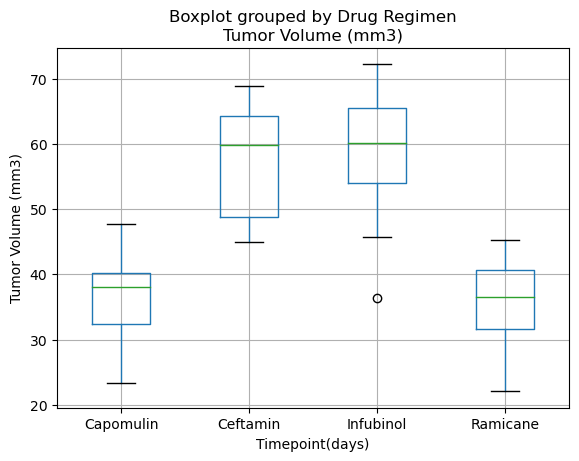

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
volume_data.boxplot(column="Tumor Volume (mm3)",by="Drug Regimen")

#plt.title("Final Tumor Volume (mm3)")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint(days)')

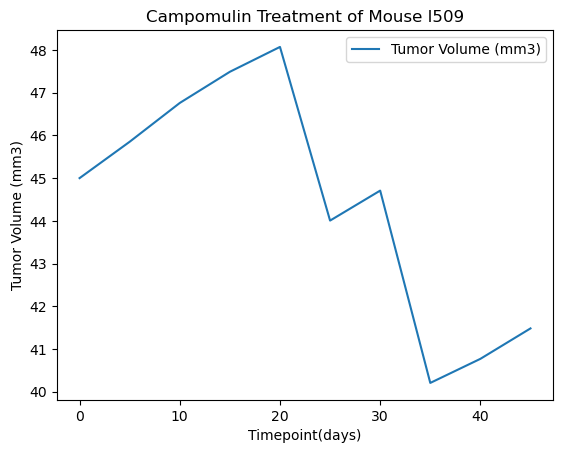

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin_df=total_df.loc[(total_df["Mouse ID"]=="l509"),:]
capomulin_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)",title="Campomulin Treatment of Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint(days)")

C:\Users\Mary\AppData\Local\Temp\ipykernel_13108\3426194292.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_df=pd.DataFrame(drug_df.groupby("Mouse ID")["Weight (g)","Tumor Volume (mm3)"].mean())


<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

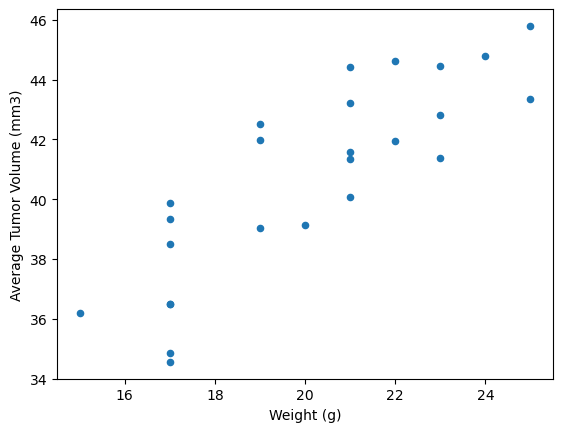

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

drug_df=total_df.loc[total_df["Drug Regimen"]=="Capomulin",:]
average_df=pd.DataFrame(drug_df.groupby("Mouse ID")["Weight (g)","Tumor Volume (mm3)"].mean())
average_df
average_df.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)",ylabel="Average Tumor Volume (mm3)")


## Correlation and Regression

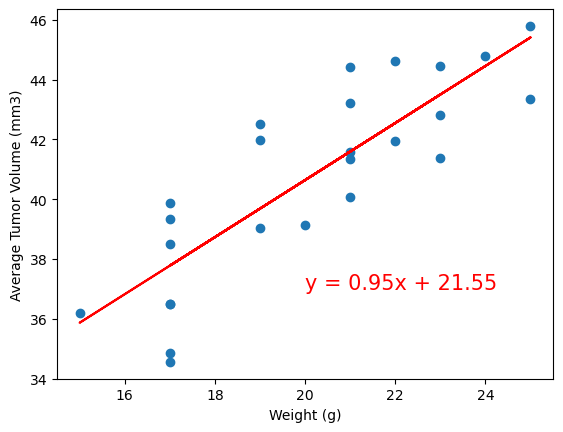

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) =linregress(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])

regression_line=average_df["Weight (g)"]*slope +intercept 

plt.scatter(average_df["Weight (g)"], average_df["Tumor Volume (mm3)"])

plt.plot(average_df["Weight (g)"], regression_line, "r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")

plt.show()